<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:** Лузин Владимир Витальевич

**Забавный факт о себе:** Написал эту работу на 8.5 баллов + 1.6 бонусных

## Общая информация

__Дата выдачи:__ 26.11.2024

__Мягкий дедлайн:__ 23:59MSK 10.12.2024

__Жесткий дедлайн:__ 23:59MSK 14.12.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 бонусных балла.

**Дисклеймер:** Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). Также помните, что простое копирование чужого кода не является самостоятельной работой.

In [5]:
# !pip3 install wandb
# !pip3 install pytorch_lightning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Assuming 'dataset' is a list of (image, class_label) tuples
labels = [label for _, label in dataset]

# Create stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indices, test_indices = next(split.split(np.zeros(len(labels)), labels))

train_dataset = [dataset[i] for i in train_indices]
test_dataset = [dataset[i] for i in test_indices]

In [3]:
# import gdown
# 
# url = "https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing"
# gdown.download_folder(url, quiet=True, use_cookies=False)

В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [3]:
df_ria = pd.read_csv('news_data/ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [4]:
df_vk = pd.read_csv('news_data/vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text'
]
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [5]:
df_comments = pd.read_csv('news_data/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

C:\Users\Vladimir Luzin\AppData\Local\Temp\ipykernel_18592\3904775836.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('news_data/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Обучить нейросеть предсказывать категорию новости
2. Построить предсказания для тех новостей, где мы ничего не знаем о категории
3. Использовать уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Провести аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (5 баллов + 1.8 бонусных)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [6]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.
а не 77?

In [7]:
target_tags = {tag for tag, cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [8]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item, jtem in tag2idx.items()}

Почистим таргет от лишних тэгов.

In [10]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [11]:
df_ria.target_tags.values[:3]

array([list([1395, 876, 642]), list([1562, 1045, 642]), list([256])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к нижнему регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [12]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize

# до удаления стоп слов
word_cnt = Counter(word_tokenize(' '.join(df_ria.title.values)))
len(word_cnt)

125217

In [14]:
import re
from nltk.tokenize import word_tokenize


def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()


df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [15]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [16]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [17]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [18]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [19]:
def create_vocab(text, stops_ru=stops_ru):
    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.5 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [20]:
# vocabulary вроде не надо делать. Удалять стоп слова тоже (в риа не удалены)
df_vk['title_clean'] = df_vk.title.apply(normalise_text)

In [21]:
df_vk['snippet_clean'] = df_vk.snippet.apply(lambda x: normalise_text(str(x)) if not pd.isna(x) else "#UNKN")

df_ria['snippet_clean'] = df_ria.snippet.apply(lambda x: normalise_text(str(x)) if not pd.isna(x) else "#UNKN")

In [22]:
df_vk.head(100)

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN
...,...,...,...,...,...,...,...,...,...
95,23982696,/20190130/1550151700.html,2019-01-30 21:03:05,Двух астраханских чиновников задержали по подо...,345,226,Задержаны мэр Камызяка и глава администрации К...,двух астраханских чиновников задержали по подо...,задержаны мэр камызяка и глава администрации к...
96,23982581,/20190130/1550159151.html,2019-01-30 20:48:08,Армения договорилась с Россией о покупке истре...,205,182,NaN,армения договорилась с россией о покупке истре...,#UNKN
97,23982383,/20190130/1550120608.html,2019-01-30 20:26:03,В Хакасии пьяная пара сожгла внука в печи,123,276,"По версии следствия, мать ребенка уехала в сос...",в хакасии пьяная пара сожгла внука в печи,по версии следствия мать ребенка уехала в сосе...
98,23982166,/20190130/1550159068.html,2019-01-30 19:58:58,"Керри заявил, что Трамп позорит страну",111,149,NaN,керри заявил что трамп позорит страну,#UNKN


In [23]:
df_ria.head(10)

,href,date,time,title,snippet,text,category,tags,shows,target_tags,title_clean,snippet_clean
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"биньямин нетаньяху,израиль,в мире",728.0,"[1395, 876, 642]",нетаньяху не собирается в отставку в случае пр...,премьерминистр израиля биньямин нетаньяху не н...
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"эммануэль макрон,франция,в мире",3086.0,"[1562, 1045, 642]",макрон в новогоднем обращении затронул тему ре...,результат реформ не может быть мгновенным заяв...
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,теннис,79.0,[256],пятая ракетка мира дель потро пропустит открыт...,аргентинский теннисист хуан мартин дель потро ...
5,/20181231/1548961218.html,2018-12-31,"31 декабря 2018, 23:06",СМИ: Кевину Спейси не разрешили отсутствовать ...,Суд в американском штате Массачусетс отверг хо...,"МОСКВА, 31 дек - РИА Новости. Суд в американск...",В мире,"кевин спейси,сша,в мире",2058.0,"[335, 642]",сми кевину спейси не разрешили отсутствовать н...,суд в американском штате массачусетс отверг хо...
6,/20181231/1548961194.html,2018-12-31,"31 декабря 2018, 23:06","""Зимняя классика"" НХЛ в 2020 году пройдет в Да...","""Зимняя классика"" - матч регулярного чемпионат...","МОСКВА, 31 дек - РИА Новости. ""Зимняя классика...",NaN,"нхл,хоккей",89.0,"[795, 774]",зимняя классика нхл в 2020 году пройдет в далл...,зимняя классика матч регулярного чемпионата н...
7,/20181231/1548961104.html,2018-12-31,"31 декабря 2018, 22:50",В Таиланде россиянин получил тяжелую черепную ...,Россиянин Борис Победоносец 1989 года рождения...,"БАНГКОК, 31 дек – РИА Новости. Россиянин Борис...",В мире,"таиланд,в мире",4427.0,"[192, 642]",в таиланде россиянин получил тяжелую черепную ...,россиянин борис победоносец 1989 года рождения...
8,/20181231/1548961026.html,2018-12-31,"31 декабря 2018, 22:33",Медведев поздравил россиян с наступающим Новым...,Глава российского правительства Дмитрий Медвед...,"МОСКВА, 31 дек - РИА Новости. Глава российског...",Общество,"новый год—2019,дмитрий медведев,россия,общество",2309.0,"[1130, 1189, 1057, 609]",медведев поздравил россиян с наступающим новым...,глава российского правительства дмитрий медвед...
9,/20181231/1548960957.html,2018-12-31,"31 декабря 2018, 22:33",Путин призвал россиян в новогоднем обращении к...,Россиянам важно быть сплоченной и единой коман...,"МОСКВА, 31 дек — РИА Новости. Россиянам важно ...",NaN,"новый год—2019,новый год,владимир путин",6209.0,"[1130, 1044, 381]",путин призвал россиян в новогоднем обращении к...,россиянам важно быть сплоченной и единой коман...
10,/20181231/1548960927.html,2018-12-31,"31 декабря 2018, 22:19",В Индонезии в результате оползней погибли не м...,По меньшей мере восемь человек погибли в резул...,"МОСКВА, 31 дек - РИА Новости. По меньшей мере ...",В мире,"индонезия,в мире",418.0,"[253, 642]",в индонезии в результате оползней погибли не м...,по меньшей мере восемь человек погибли в резул...
11,/20181231/1548960892.html,2018-12-31,"31 декабря 2018, 22:10","В аэропорту Амстердама задержали пассажира, уг...","Пассажир, угрожавший взорвать бомбу в амстерда...","МОСКВА, 31 дек - РИА Новости. Пассажир, угрожа...",В мире,"амстердам,в мире",1058.0,"[1093, 642]",в аэропорту амстердама задержали пассажира угр...,пассажир угрожавший взорвать бомбу в амстердам...


## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [24]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [25]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [26]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

__[0.5 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [27]:
((df.date >= '2018-12-01') & (df.date <= '2018-12-31')).sum()

20176

In [28]:
# Не буду брать данные из test_hrefs

df_test = df[((df.date >= '2018-12-01') & (df.date <= '2018-12-31'))]
df_val = df[((df.date >= '2018-10-01') & (df.date <= '2018-11-31'))]
df_train = df[(df.date <= '2018-9-31')]

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

Напишем датасет для поставки данных в нейросеть.


In [29]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181206/1547493936.html,эксперты определили самые бюджетные экзотическ...,"[192, 332]"
1,/20181206/1547516457.html,рада приняла закон расширяющий контролируемую ...,"[390, 642]"
2,/20181206/1547520788.html,россия оказалась родиной древнейших титанозавр...,"[1169, 288]"
3,/20181206/1547521406.html,школа в красноярске превратилась в хогвартс из...,[609]
4,/20181206/1547522342.html,рада решила не продлевать договор о дружбе и с...,"[778, 642]"


In [30]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None,
                 max_snippet_len=None):

        self.vocab = {word: idx for word, idx in vocab.items() if idx < vocab_size}
        self.max_classes = max_classes
        self.y = self.target_ohe(target)
        self.X_title = self.create_text(title, max_title_len)
        if snippet:
            self.X_snippet = self.create_text(snippet, max_snippet_len)
        else:
            self.X_snippet = None

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i] * len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = []
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.X_snippet:
            return (self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx])
        return (self.X_title[idx, :], self.y[idx])

__[0.5 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

In [31]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None,
                 max_snippet_len=None):

        self.vocab = {word: idx for word, idx in vocab.items() if idx < vocab_size}
        self.max_classes = max_classes
        self.y = self.target_ohe(target)
        self.X_title = self.create_text(title, max_title_len)
        if snippet is not None:
            self.X_snippet = self.create_text(snippet, max_snippet_len)
        else:
            self.X_snippet = None

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i] * len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = []
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.X_snippet is not None:
            return (self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx])
        return (self.X_title[idx, :], self.y[idx])


Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [32]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE,
                            MAX_TITLE_LEN, CLASSES_NUM)
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN,
                          CLASSES_NUM)
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE,
                           MAX_TITLE_LEN, CLASSES_NUM)

In [33]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [34]:
from torch import nn
import torch.nn.functional as F


class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [35]:
import pytorch_lightning as pl


class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True, logger=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True, logger=True
        )
        return loss

Обучим модель.

In [36]:
import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: vldmrl (vldmrl-org). Use `wandb login --relogin` to force relogin


True

In [37]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [38]:
run1 = wandb.init(project="iad-hw4", name="baseline")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_163237-987rr4lk
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run baseline
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/987rr4lk


In [39]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM).to(device)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModule(model_baseline, LR, criterion)

trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator=device.type,
    max_epochs=EPOCHS)
trainer.fit(train_module, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jupyter/.local/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleClassifier | 3.5 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.906    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 3130/3130 [00:28<00:00, 108.12it/s, v_num=r4lk, train_loss=11.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 3130/3130 [00:28<00:00, 108.86it/s, v_num=r4lk, train_loss=11.10, val_loss=11.20]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 3130/3130 [00:29<00:00, 107.76it/s, v_num=r4lk, train_loss=8.240, val_loss=9.250]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 3130/3130 [00:28<00:00, 108.67it/s, v_num=r4lk, train_loss=7.790, val_loss=8.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:28<00:00, 108.51it/s, v_num=r4lk, train_loss=6.690, val_loss=7.860]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:30<00:00, 104.27it/s, v_num=r4lk, train_loss=6.690, val_loss=7.560]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3130/3130 [00:31<00:00, 100.02it/s, v_num=r4lk, train_loss=6.690, val_loss=7.560]


In [40]:
run1.finish()

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:               epoch ▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆████████
wandb:          train_loss ▇█▆▅▆▅▆▅▄▅▄▄▅▃▃▄▄▄▂▂▃▃▂▂▄▂▂▃▂▂▂▂▂▃▂▂▂▁▂▁
wandb: trainer/global_step ▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
wandb:            val_loss █▄▂▂▁
wandb: 
wandb: Run summary:
wandb:               epoch 4
wandb:          train_loss 6.68641
wandb: trainer/global_step 15649
wandb:            val_loss 7.55669
wandb: 
wandb: 🚀 View run baseline at: https://wandb.ai/vldmrl-org/iad-hw4/runs/987rr4lk
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 10 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_163237-987rr4lk/logs


__[1 балл] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [41]:
# Поменяю датасеты

CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
MAX_SNIPPET_LEN = 100

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset_snippet = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE,
                                    MAX_TITLE_LEN, CLASSES_NUM, df_train.snippet_clean.values, MAX_SNIPPET_LEN)
val_dataset_snippet = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE,
                                  MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, MAX_SNIPPET_LEN)
test_dataset_snippet = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE,
                                   MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, MAX_SNIPPET_LEN)

In [42]:
train_dataloader_snippet = DataLoader(train_dataset_snippet, shuffle=True, batch_size=64, num_workers=4)
val_dataloader_snippet = DataLoader(val_dataset_snippet, shuffle=False, batch_size=4096, num_workers=4)

In [43]:
from torch import nn
import torch.nn.functional as F


class ConcatClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(2 * embedding_dim, output_dim)

    def forward(self, title, snippet):
        embedding_title = self.embedding(title)
        embedding_snippet = self.embedding(snippet)

        embedded_title = embedding_title.mean(dim=1)
        embedded_snippet = embedding_snippet.mean(dim=1)

        embedded_concat = torch.cat((embedded_title, embedded_snippet), dim=1)
        return self.fc(embedded_concat)

In [44]:
import pytorch_lightning as pl


class TrainLightningModuleConcat(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title, snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True, logger=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True, logger=True
        )
        return loss

In [47]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [48]:
run22 = wandb.init(project="iad-hw4", name="baseline_with_concat_snippet")

In [49]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_concat = ConcatClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM).to(device)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModuleConcat(model_concat, LR, criterion)

trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator=device.type,
    max_epochs=EPOCHS
)
trainer.fit(train_module, train_dataloader_snippet, val_dataloader_snippet)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jupyter/.local/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ConcatClassifier | 4.0 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
15.806    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 3130/3130 [00:31<00:00, 97.96it/s, v_num=ivcr, train_loss=11.30]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 3130/3130 [00:33<00:00, 94.53it/s, v_num=ivcr, train_loss=8.150, val_loss=10.30]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 3130/3130 [00:33<00:00, 94.79it/s, v_num=ivcr, train_loss=7.550, val_loss=8.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 3130/3130 [00:32<00:00, 94.99it/s, v_num=ivcr, train_loss=7.970, val_loss=7.570]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:32<00:00, 94.85it/s, v_num=ivcr, train_loss=6.190, val_loss=7.120]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:34<00:00, 91.00it/s, v_num=ivcr, train_loss=6.190, val_loss=6.830]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3130/3130 [00:35<00:00, 87.31it/s, v_num=ivcr, train_loss=6.190, val_loss=6.830]


In [50]:
run22.finish()

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:               epoch ▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆███████
wandb:          train_loss █▅▅▅▃▃▄▄▄▁▄▄▃▃▃▃▃▃▂▃▃▂▂▂▂▂▃▂▁▂▂▂▂▂▁▂▁▂▂▃
wandb: trainer/global_step ▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇▇▇█
wandb:            val_loss █▄▂▂▁
wandb: 
wandb: Run summary:
wandb:               epoch 4
wandb:          train_loss 6.19036
wandb: trainer/global_step 15649
wandb:            val_loss 6.82983
wandb: 
wandb: 🚀 View run baseline_with_concat_snippet at: https://wandb.ai/vldmrl-org/iad-hw4/runs/wr4hivcr
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 10 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_163910-wr4hivcr/logs


In [51]:
# Ссылка на отчёт
# https://wandb.ai/vldmrl-org/iad-hw4/reports/iad-hw4-task-1-4--VmlldzoxMDU4OTU5NQ?accessToken=ebnhkzlhu5zdvgdl12fvyf6ph3hxa54er52t81v4e7r381uqd34j7d8wqc23habq

## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [52]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num / (denum + 1e-5)).mean().item()


def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num / (denum + 1e-5)).mean().item()


def exact_match(target, y_pred):
    return (1. * (y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [53]:
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

for title, target in test_dataloader:
    logit = model_baseline(title)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [54]:
TRESHOLD = 0.01
y_pred = 1 * (pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.996111273765564
Precision: 0.3458990752696991
Recall: 0.877444863319397


In [55]:
TRESHOLD = 0
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.0016850766260176897
Precision: 0.0016850765096023679
Recall: 0.9999951720237732


In [56]:
TRESHOLD = 0.05
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9985899925231934
Precision: 0.5837936997413635
Recall: 0.7456861734390259


In [57]:
TRESHOLD = 0.5
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983960390090942
Precision: 0.1557280272245407
Recall: 0.09014224261045456


In [58]:
TRESHOLD = 0.9
y_pred = 1 * (pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.998320460319519
Precision: 0.009070091880857944
Recall: 0.008888359181582928


Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [59]:
def get_predict(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, target in dataloader:
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

__[0.5 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__ Скорее всего важнее будет полнота, поскольку в данной задачи не страшно будет добавить новости лишний тег. От этого максимум возникнет небольшая путаница среди пользователей, которая никак не навредит пользователям. Большой recall же даст статьям больше тегов, по которым их можно находить и, следовательно, получать больше доходов с рекламы. Скорее всего важнее будет полнота, поскольку в данной задачи не страшно будет добавить новости лишний тег. От этого максимум возникнет небольшая путаница среди пользователей, которая никак не навредит пользователям. Большой recall же даст статьям больше тегов, по которым их можно находить и, следовательно, получать больше доходов с рекламы.
Но по этой метрике не получится подбирать порог, так как в таком случае будет достаточно просто поставить все возможные метки. Так

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [60]:
def f_score(target, y_pred, beta=1):
    p = precision(target, y_pred)
    r = recall(target, y_pred)
    f2 = (1 + beta ** 2) * (p * r) / ((beta ** 2 * p) + r + 1e-10)
    return f2

In [61]:
run_inf = wandb.init(project="iad-hw4", name="inference", resume="allow")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_164347-emrnx9xb
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run inference
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/emrnx9xb


In [62]:

# Почему-то использует cpu, хотя модель на gpu. Не перенёс данные?
thresholds = np.linspace(0, 1, 100)
best_f2_score_base = 0
best_threshold_base = -1

for threshold in thresholds:
    pred_prob, target = get_predict(model_baseline, val_dataset)

    y_pred = 1 * (pred_prob > threshold)

    f2 = f_score(target, y_pred, beta=2)

    if f2 > best_f2_score_base:
        best_f2_score_base = f2
        best_threshold_base = threshold

print("best f2:", best_f2_score_base)
print("best threshold:", best_threshold_base)

best f2: 0.7720337524868681
best threshold: 0.030303030303030304


In [63]:
# baseline
TRESHOLD = best_threshold_base

pred_prob, target = get_predict(model_baseline, test_dataset)
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))
print('f2 score:', f_score(target, y_pred, 2))

Exact Match: 0.9981899261474609
Precision: 0.5158630609512329
Recall: 0.7971473336219788
f2 score: 0.7187634137645732


In [64]:
def get_predict_snippet(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, snippet, target in dataloader:
        logit = model(title, snippet)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

In [65]:
thresholds = np.linspace(0, 1, 100)
best_f2_score_snippet = 0
best_threshold_snippet = -1

for threshold in thresholds:
    pred_prob, target = get_predict_snippet(model_concat, val_dataset_snippet)

    y_pred = 1 * (pred_prob > threshold)

    f2 = f_score(target, y_pred, beta=2)

    if f2 > best_f2_score_snippet:
        best_f2_score_snippet = f2
        best_threshold_snippet = threshold

print("best f2:", best_f2_score_snippet)
print("best threshold:", best_threshold_snippet)

best f2: 0.8172553432740732
best threshold: 0.030303030303030304


In [66]:
# Со сниппетами не поменялся

TRESHOLD = best_threshold_snippet

pred_prob, target = get_predict_snippet(model_concat, test_dataset_snippet)
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))
print('f2 score:', f_score(target, y_pred, 2))

Exact Match: 0.9983422160148621
Precision: 0.5432437658309937
Recall: 0.8528434038162231
f2 score: 0.7655810607432414


In [67]:
run_inf.finish()

wandb:                                                                                
wandb: 🚀 View run inference at: https://wandb.ai/vldmrl-org/iad-hw4/runs/emrnx9xb
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_164347-emrnx9xb/logs


Ответ: Модель со сниппетами оказалась лучше как с точки зрения лосса, так и метрик (f1 увеличилась с с 0.71 до 0.76)

model_concat__[0.5 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [68]:
df_oob.head()

,href,title_clean,target_tags
0,/20181206/1547493936.html,эксперты определили самые бюджетные экзотическ...,"[192, 332]"
1,/20181206/1547516457.html,рада приняла закон расширяющий контролируемую ...,"[390, 642]"
2,/20181206/1547520788.html,россия оказалась родиной древнейших титанозавр...,"[1169, 288]"
3,/20181206/1547521406.html,школа в красноярске превратилась в хогвартс из...,[609]
4,/20181206/1547522342.html,рада решила не продлевать договор о дружбе и с...,"[778, 642]"


In [69]:
oob_dataset = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN,
                          CLASSES_NUM)

In [70]:
pred_prob, target = get_predict(model_baseline, oob_dataset)
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))
print('f2 score:', f_score(target, y_pred, 2))

Exact Match: 0.9979013800621033
Precision: 0.44545894861221313
Recall: 0.7395898103713989
f2 score: 0.6533147333188314


Ответ: Да, качество проседает. Нормально так проседает. С 0.7176257120249016 до 0.6494800412789697. Возможно нужно подобрать новый порог

Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.9 балла] Бонусное задание 1:__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__Ваш лог экспериментов:__

Сразу все: 
https://wandb.ai/vldmrl-org/iad-hw4/reports/ida-hw4-all--VmlldzoxMDU5OTMxMQ

С оптимизаторами играться нет желания, обычно, когда я вместо Adam'a пытался брать более простые оптимизаторы качество падало. Но попробую взять несколько вариантов архитектур (а именно 3, так как в задании не требуется сделать прям много экспериментов)

1) 1 слой свёртки
1) 2 слоя свёртки
2) 2 слоя вёртки с residual connection

Обе модели не слишком глубокие, чтобы модель обучилась. Оставлю количество эпох на 5, так как в любом случае для обучение нужно 10+
А ещё у меня упало ядро при инференсе последней модели, так что я не хочу ждать по 10 эпох снова...

In [71]:
# Буду модернизировать способ со сниппетами
# Conv 1 слой
from torch import nn
import torch.nn.functional as F


class Conv1Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 2 * embedding_dim, 3, padding=1)
        self.fc = nn.Linear(2 * 2 * embedding_dim, output_dim)

    def forward(self, title, snippet):
        embedding_title = self.embedding(title).transpose(1, 2)
        embedding_snippet = self.embedding(snippet).transpose(1, 2)
        
        conv1_title = self.conv1(embedding_title)
        conv1_snippet = self.conv1(embedding_snippet)

        embedded_title = conv1_title.mean(dim=2)
        embedded_snippet = conv1_snippet.mean(dim=2)

        embedded_concat = torch.cat((embedded_title, embedded_snippet), dim=1)
        return self.fc(embedded_concat)

In [72]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [73]:
run_conv1l = wandb.init(project="iad-hw4", name="Convolution1l_with_snippet",  resume="allow")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_165648-du6xx5xk
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Convolution1l_with_snippet
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/du6xx5xk


In [74]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_1conv = Conv1Classifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM).to(device)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModuleConcat(model_1conv, LR, criterion)

trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator=device.type,
    max_epochs=EPOCHS
)
trainer.fit(train_module, train_dataloader_snippet, val_dataloader_snippet)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jupyter/.local/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | Conv1Classifier  | 5.4 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
5.4 M     Trainable params
0         Non-trainable params
5.4 M     Total params
21.767    Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 3130/3130 [00:42<00:00, 73.30it/s, v_num=x5xk, train_loss=9.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 3130/3130 [00:43<00:00, 71.60it/s, v_num=x5xk, train_loss=7.380, val_loss=9.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 3130/3130 [00:43<00:00, 71.15it/s, v_num=x5xk, train_loss=7.560, val_loss=8.210]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 3130/3130 [00:43<00:00, 71.19it/s, v_num=x5xk, train_loss=6.630, val_loss=7.650]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:43<00:00, 71.46it/s, v_num=x5xk, train_loss=7.830, val_loss=7.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:45<00:00, 68.71it/s, v_num=x5xk, train_loss=7.830, val_loss=6.900]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3130/3130 [00:47<00:00, 66.13it/s, v_num=x5xk, train_loss=7.830, val_loss=6.900]


In [75]:
run_conv1l.finish()

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:               epoch ▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆███████
wandb:          train_loss █▇▇▇▄▄▃▄▅▅▄▂▃▄▃▂▄▂▅▄▃▃▂▃▃▂▃▃▄▃▂▄▂▂▃▁▁▁▃▃
wandb: trainer/global_step ▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
wandb:            val_loss █▅▃▂▁
wandb: 
wandb: Run summary:
wandb:               epoch 4
wandb:          train_loss 7.82926
wandb: trainer/global_step 15649
wandb:            val_loss 6.90402
wandb: 
wandb: 🚀 View run Convolution1l_with_snippet at: https://wandb.ai/vldmrl-org/iad-hw4/runs/du6xx5xk
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 10 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_165648-du6xx5xk/logs


In [76]:
# Буду модернизировать способ со сниппетами
# Conv 2 слоя
from torch import nn
import torch.nn.functional as F


class Conv2Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 2 * embedding_dim, 3, padding=1)
        self.conv2 = nn.Conv1d(2 * embedding_dim, 4 * embedding_dim, 3, padding=1)
        self.fc = nn.Linear(2 * 4 * embedding_dim, output_dim)

    def forward(self, title, snippet):
        embedding_title = self.embedding(title).transpose(1, 2)
        embedding_snippet = self.embedding(snippet).transpose(1, 2)
        
        conv1_title = self.conv1(embedding_title)
        conv1_snippet = self.conv1(embedding_snippet)
        
        conv2_title = self.conv2(conv1_title)
        conv2_snippet = self.conv2(conv1_snippet)

        embedded_title = conv2_title.mean(dim=2)
        embedded_snippet = conv2_snippet.mean(dim=2)

        embedded_concat = torch.cat((embedded_title, embedded_snippet), dim=1)
        return self.fc(embedded_concat)

In [77]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [78]:
run4 = wandb.init(project="iad-hw4", name="Convolution2l_with_snippet")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_170058-yznpi50n
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Convolution2l_with_snippet
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/yznpi50n


In [79]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_2conv = Conv2Classifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM).to(device)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModuleConcat(model_2conv, LR, criterion)

trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator=device.type,
    max_epochs=EPOCHS
)
trainer.fit(train_module, train_dataloader_snippet, val_dataloader_snippet)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jupyter/.local/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | Conv2Classifier  | 9.5 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
9.5 M     Trainable params
0         Non-trainable params
9.5 M     Total params
38.010    Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 3130/3130 [01:09<00:00, 45.27it/s, v_num=i50n, train_loss=10.70]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 3130/3130 [01:10<00:00, 44.49it/s, v_num=i50n, train_loss=11.00, val_loss=10.50]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 3130/3130 [01:10<00:00, 44.58it/s, v_num=i50n, train_loss=9.200, val_loss=9.270]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 3130/3130 [01:10<00:00, 44.63it/s, v_num=i50n, train_loss=10.10, val_loss=8.700]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [01:10<00:00, 44.65it/s, v_num=i50n, train_loss=8.030, val_loss=8.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [01:13<00:00, 42.66it/s, v_num=i50n, train_loss=8.030, val_loss=7.820]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3130/3130 [01:16<00:00, 40.89it/s, v_num=i50n, train_loss=8.030, val_loss=7.820]


In [80]:
run4.finish()

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:               epoch ▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆████████
wandb:          train_loss █▇█▅▆▇▄▅▅▄▅▇▄▃▄▄▂▃▄▄▄▅▅▆▂▂▃▂▄▄▂▁▄▁▃▃▃▁▂▅
wandb: trainer/global_step ▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇█
wandb:            val_loss █▅▃▂▁
wandb: 
wandb: Run summary:
wandb:               epoch 4
wandb:          train_loss 8.03218
wandb: trainer/global_step 15649
wandb:            val_loss 7.82299
wandb: 
wandb: 🚀 View run Convolution2l_with_snippet at: https://wandb.ai/vldmrl-org/iad-hw4/runs/yznpi50n
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 10 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_170058-yznpi50n/logs


In [81]:
# Буду модернизировать способ со сниппетами
from torch import nn
import torch.nn.functional as F


class ResClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 2 * embedding_dim, 3, padding=1)
        self.conv2 = nn.Conv1d(2 * embedding_dim, embedding_dim, 3, padding=1)
        self.fc = nn.Linear(2 * embedding_dim, output_dim)

    def forward(self, title, snippet):
        embedding_title = self.embedding(title).transpose(1, 2)
        embedding_snippet = self.embedding(snippet).transpose(1, 2)
        
        conv1_title = self.conv1(embedding_title)
        conv1_snippet = self.conv1(embedding_snippet)
        
        conv2_title = self.conv2(conv1_title)
        conv2_snippet = self.conv2(conv1_snippet)
        
        res_title = embedding_title + conv2_title
        res_snippet = embedding_snippet + conv2_snippet

        embedded_title = res_title.mean(dim=2)
        embedded_snippet = res_snippet.mean(dim=2)

        embedded_concat = torch.cat((embedded_title, embedded_snippet), dim=1)
        return self.fc(embedded_concat)

In [82]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [83]:
run5 = wandb.init(project="iad-hw4", name="Resnet_with_snippet")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_170732-4bddb59v
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Resnet_with_snippet
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/4bddb59v


In [84]:
EMBEDDING_DIM = 300
EPOCHS = 5 # Сделаю 5 эпох, так как слишком долго. Да и 10 эпох всё равно не хватит.
LR = 1e-3

model_res = ResClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM).to(device)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModuleConcat(model_res, LR, criterion)

trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator=device.type,
    max_epochs=EPOCHS
)
trainer.fit(train_module, train_dataloader_snippet, val_dataloader_snippet)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jupyter/.local/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResClassifier    | 5.0 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
20.129    Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 3130/3130 [00:51<00:00, 60.26it/s, v_num=b59v, train_loss=11.70]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 3130/3130 [00:53<00:00, 58.81it/s, v_num=b59v, train_loss=7.380, val_loss=9.460]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 3130/3130 [00:53<00:00, 58.44it/s, v_num=b59v, train_loss=8.500, val_loss=8.810]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 3130/3130 [00:53<00:00, 58.45it/s, v_num=b59v, train_loss=6.990, val_loss=8.200]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:53<00:00, 58.45it/s, v_num=b59v, train_loss=8.900, val_loss=7.740]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:55<00:00, 56.19it/s, v_num=b59v, train_loss=8.900, val_loss=7.500]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3130/3130 [00:57<00:00, 54.48it/s, v_num=b59v, train_loss=8.900, val_loss=7.500]


In [85]:
run5.finish()

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:               epoch ▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆████████
wandb:          train_loss █▅▄▄▄▄▃▃▃▁▂▁▃▂▁▁▂▃▁▁▂▂▃▂▂▂▁▂▃▂▂▂▂▁▁▂▂▂▂▁
wandb: trainer/global_step ▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇███
wandb:            val_loss █▆▃▂▁
wandb: 
wandb: Run summary:
wandb:               epoch 4
wandb:          train_loss 8.90318
wandb: trainer/global_step 15649
wandb:            val_loss 7.50139
wandb: 
wandb: 🚀 View run Resnet_with_snippet at: https://wandb.ai/vldmrl-org/iad-hw4/runs/4bddb59v
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 10 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_170732-4bddb59v/logs


__[0.9 балла] Бонусное задание 2:__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются в вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

Сразу все эксперименты:
https://wandb.ai/vldmrl-org/iad-hw4/reports/ida-hw4-all--VmlldzoxMDU5OTMxMQ
-
-

In [86]:
# Возьму news_upos_skipgram_300_5_2019, так как он имеет лучшее качество и смог скачаться
# И первую обученную модель со свёрткой

# Буду использовать gensim для загрузки эмбеддингов
import gensim

pretrained_embedding = gensim.models.KeyedVectors.load_word2vec_format("model.bin", binary=True)

In [87]:
# Создам новый словарь из пересечения слов эмбеддинга и заголовка

vocabulary_current = set(create_vocab(' '.join(df_ria.title_clean.values)))
vocabulary_embedding = vocabulary_current.intersection(set(pretrained_embedding.key_to_index.keys()))
vocabulary_full = ["#UNKN"] + sorted(vocabulary_embedding)



In [88]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [89]:
run6 = wandb.init(project="iad-hw4", name="Pretrained_embedding_with_snippet")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_171241-c1hvcdzb
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Pretrained_embedding_with_snippet
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/c1hvcdzb


In [90]:
# Создание эмбеддингов со словами словаря 

#  word2idx = {word: idx for idx, word in enumerate(vocabulary_full)}
#  
#  embedding_matrix = torch.zeros((len(vocabulary_full), EMBEDDING_DIM))
#  
#  embedding_matrix[word2idx["#UNKN"]] = torch.randn(EMBEDDING_DIM)
#  
#  # Заполнение матрицы предобученными эмбеддингами
#  for word in vocabulary_embedding:
#      embedding_matrix[word2idx[word]] = torch.tensor(pretrained_embedding[word])

In [91]:
# Поменяю датасеты

CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
MAX_SNIPPET_LEN = 100


# объявляем датасеты
train_dataset_embedding= NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE,
                                    MAX_TITLE_LEN, CLASSES_NUM, df_train.snippet_clean.values, MAX_SNIPPET_LEN)
val_dataset_embedding = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE,
                                  MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, MAX_SNIPPET_LEN)
test_dataset_embedding = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE,
                                   MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, MAX_SNIPPET_LEN)

In [92]:
train_dataloader_snippet = DataLoader(train_dataset_embedding, shuffle=True, batch_size=64, num_workers=4)
val_dataloader_snippet = DataLoader(val_dataset_embedding, shuffle=False, batch_size=4096, num_workers=4)

In [93]:
from torch import nn
import torch.nn.functional as F



class ResVecClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(pretrained_embedding.vectors), freeze=True)
        self.conv1 = nn.Conv1d(embedding_dim, 2 * embedding_dim, 3, padding=1)
        self.fc = nn.Linear(4 * embedding_dim, output_dim)

    def forward(self, title, snippet):
        embedding_title = self.embedding(title).transpose(1, 2)
        embedding_snippet = self.embedding(snippet).transpose(1, 2)
        
        conv1_title = self.conv1(embedding_title)
        conv1_snippet = self.conv1(embedding_snippet)

        embedded_title = conv1_title.mean(dim=2)
        embedded_snippet = conv1_snippet.mean(dim=2)

        embedded_concat = torch.cat((embedded_title, embedded_snippet), dim=1)
        return self.fc(embedded_concat)



In [94]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_res_pretrained = ResVecClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM).to(device)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModuleConcat(model_res_pretrained, LR, criterion)

trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator=device.type,
    max_epochs=EPOCHS
)
trainer.fit(train_module, train_dataloader_snippet, val_dataloader_snippet)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jupyter/.local/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResVecClassifier | 77.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
2.4 M     Trainable params
74.8 M    Non-trainable params
77.2 M    Total params
308.949   Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 3130/3130 [00:32<00:00, 95.02it/s, v_num=cdzb, train_loss=10.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 3130/3130 [00:35<00:00, 88.45it/s, v_num=cdzb, train_loss=8.660, val_loss=11.60]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 3130/3130 [00:35<00:00, 88.86it/s, v_num=cdzb, train_loss=9.550, val_loss=10.40]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 3130/3130 [00:35<00:00, 88.63it/s, v_num=cdzb, train_loss=8.340, val_loss=9.920]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:35<00:00, 87.41it/s, v_num=cdzb, train_loss=8.590, val_loss=9.500]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 3130/3130 [00:37<00:00, 82.94it/s, v_num=cdzb, train_loss=8.590, val_loss=9.370]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3130/3130 [00:49<00:00, 63.02it/s, v_num=cdzb, train_loss=8.590, val_loss=9.370]


In [95]:
run6.finish()

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:               epoch ▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆█████
wandb:          train_loss █▅▅▃▅▄▅▄▂▃▂▁▂▃▃▂▂▂▄▁▁▁▄▂▂▃▂▂▃▁▂▃▂▁▃▂▃▃▂▁
wandb: trainer/global_step ▁▁▁▁▁▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
wandb:            val_loss █▄▃▁▁
wandb: 
wandb: Run summary:
wandb:               epoch 4
wandb:          train_loss 8.5873
wandb: trainer/global_step 15649
wandb:            val_loss 9.37033
wandb: 
wandb: 🚀 View run Pretrained_embedding_with_snippet at: https://wandb.ai/vldmrl-org/iad-hw4/runs/c1hvcdzb
wandb: ⭐️ View project at: https://wandb.ai/vldmrl-org/iad-hw4
wandb: Synced 5 W&B file(s), 0 media file(s), 10 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20241214_171241-c1hvcdzb/logs


In [96]:
# Вывод: замороженные предобученный эмбеддинг обучается либо очень долго, либо очень плохо. Причиной этому может быть уникальность словаря нашего датасета или размер эмбеддинга

__[1.5 балла] Задание 7:__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.

__Ваш лог экспериментов:__

-
-
-

In [97]:
# Буду файнтюнить ruT5-base, как на семинаре, поскольку эта маленький трансформер предназначенный для русскомго языка
# На семинаре его обучали с помощью лайтнинга. Попробую повторить процесс

import transformers
from pytorch_lightning.callbacks import Callback, ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import T5ForConditionalGeneration, T5Tokenizer

ModuleNotFoundError: No module named 'transformers'

In [ ]:
model_finetuned = None # TODO

Сравните все обученные модели между собой на тестовой выборке.

In [98]:
wandb_logger = WandbLogger(
    log_model='all'
)

In [99]:
run_inference = wandb.init(project="iad-hw4", name="inference2", resume="allow")

wandb: Tracking run with wandb version 0.18.5
wandb: Run data is saved locally in /home/jupyter/work/resources/hw2/wandb/run-20241214_172522-j6zic8g1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run inference2
wandb: ⭐️ View project at https://wandb.ai/vldmrl-org/iad-hw4
wandb: 🚀 View run at https://wandb.ai/vldmrl-org/iad-hw4/runs/j6zic8g1


In [100]:
# baseline
TRESHOLD = best_threshold_base

pred_prob, target = get_predict(model_baseline, test_dataset)
y_pred = 1 * (pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))
print('f2 score:', f_score(target, y_pred, 2))

Exact Match: 0.9981899261474609
Precision: 0.5158630609512329
Recall: 0.7971473336219788
f2 score: 0.7187634137645732


In [103]:
# без файнтюна
# TRESHOLD (для сниппетов) из прошлых заданий буду использовать для всех моделей 
TRESHOLD = best_threshold_snippet

models = {
    'model concat': model_concat,
    'model 1conv': model_1conv,
    'model 2conv': model_2conv,
    'model res': model_res,
    'model res_pretrained': model_res_pretrained,
    #'model fine-tuned transformer': model_finetuned
}
for model_name, model in models.items():
    print(model_name)
    pred_prob, target = get_predict_snippet(model, test_dataset_snippet)
    y_pred = 1 * (pred_prob > TRESHOLD)
    print('Exact Match:', exact_match(target, y_pred))
    print('Precision:', precision(target, y_pred))
    print('Recall:', recall(target, y_pred))
    print('f2 score:', f_score(target, y_pred, 2))
    
# И тут у меня упали все модели...
# Может успею всё обучить ещё раз

# Со второго раза всё заработало (возможно я сам дропнул ядро)

model concat
Exact Match: 0.9983422160148621
Precision: 0.5432437658309937
Recall: 0.8528434038162231
f2 score: 0.7655810607432414
model 1conv
Exact Match: 0.9983150362968445
Precision: 0.5520628094673157
Recall: 0.8599421977996826
f2 score: 0.7736508724682344
model 2conv
Exact Match: 0.9980069398880005
Precision: 0.4958565831184387
Recall: 0.8007535338401794
f2 score: 0.7130626077715021
model res
Exact Match: 0.9980902075767517
Precision: 0.5096525549888611
Recall: 0.8239336609840393
f2 score: 0.7334732896904187
model res_pretrained
Exact Match: 0.9969848990440369
Precision: 0.3356613516807556
Recall: 0.6686286330223083
f2 score: 0.5579368755487518


In [ ]:
# Зафайнтюненая модель
# TODO

## Часть 2: предсказание категорий (0.5 балла)

**[0.5 балла] Задание 8:** Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

In [104]:
# Буду предсказывать категории по model 1conv, как самой удачной по метрике f2
df_vk['target_tags'] = [[0]] * df_vk.shape[0]

In [107]:
df_vk.head(20)

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,[0]
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,[0]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,[0]
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,[0]
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,[0]
5,24005669,/20190201/1550256715.html,2019-02-01 20:43:42,Жительница Белгорода перевела мошенникам 43 ми...,79,155,NaN,жительница белгорода перевела мошенникам 43 ми...,#UNKN,[0]
6,24005531,/20190201/1550266666.html,2019-02-01 20:20:22,"В Подмосковье врачи спасли руку пациента, пере...",155,47,NaN,в подмосковье врачи спасли руку пациента перес...,#UNKN,[0]
7,24005400,/20190201/1550280682.html,2019-02-01 19:53:43,Трамп хочет заключить новый договор на смену Д...,45,72,NaN,трамп хочет заключить новый договор на смену д...,#UNKN,[0]
8,24005074,/20190201/1550257362.html,2019-02-01 19:02:05,Лукашенко поручил убрать из школьных программ ...,144,151,NaN,лукашенко поручил убрать из школьных программ ...,#UNKN,[0]
9,24004899,https://rsport.ria.ru/20190201/1550277848.html,2019-02-01 18:35:07,Сборная России вышла в финал чемпионата мира п...,407,55,NaN,сборная россии вышла в финал чемпионата мира п...,#UNKN,[0]


In [118]:
def create_text(texts, max_len, vocab):
        result = []
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

In [132]:
vk_dataset = NewsDataset(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE,
                                    MAX_TITLE_LEN, CLASSES_NUM, df_vk.snippet_clean.values, MAX_SNIPPET_LEN)

In [140]:
pred_prob, target = get_predict_snippet(model_1conv, vk_dataset)
y_pred = 1 * (pred_prob > TRESHOLD)

In [141]:
y_pred

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [151]:
y_pred[0]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [181]:
df_vk["target_tags"] = y_pred.tolist()

In [186]:
df_vk

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [ ]:
df_vk.target_tags.sum(axis=)

In [187]:
# Ваш код с сохранением данных

df_vk.to_csv("df_vk")

## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [198]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели?
2. Как выглядит архитектура модели? Насколько модель большая?
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?

Установим библиотеку. 🤗🤗🤗

In [204]:
%pip install torch torchvision
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [6]:
from transformers import pipeline, AutoTokenizer

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("seara/rubert-tiny2-russian-sentiment")
model = pipeline("sentiment-analysis", model="seara/rubert-tiny2-russian-sentiment", device=device)

Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [12]:
# Возьму 1000 значений, иначе слишком долго
# 1000 значений за 6 секунд
# весь датасет 2612 * 4 = 15672сек = 10448 = 174 минуты. До дедлайна 140 минут
# Вывод: беру проскоренный датасет, который скинули в чате)

# https://stackoverflow.com/questions/64320883/the-size-of-tensor-a-707-must-match-the-size-of-tensor-b-512-at-non-singleto
df_comments_head = df_comments.head(1000).copy()

def extract_sentiment_info(text):
    tokens = tokenizer(text, padding=True, truncation=True, max_length=512, add_special_tokens = True)
    truncated_text = tokenizer.decode(tokens['input_ids'], skip_special_tokens=True)
    result = model(truncated_text)
    return pd.Series([result[0]['label'], result[0]['score']])

df_comments_head[['sentiment_verdict', 'sentiment_score']] = df_comments_head['text'].apply(extract_sentiment_info)

In [13]:
df_comments_head

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.909071
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.669113
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223
...,...,...,...,...,...,...,...
1027,24004396.0,24004064.0,2019-02-01 17:36:30,"Россиян поймали за наркоту, а местная фауна уж...",7.0,negative,0.531011
1029,24004413.0,24004064.0,2019-02-01 17:38:17,"[id470184591|Андрей], как доказательств нет?) ...",11.0,neutral,0.559303
1030,24004417.0,24004064.0,2019-02-01 17:38:47,"[id17449942|Дмитрий], надо было труп за борт и...",2.0,neutral,0.631467
1031,24004420.0,24004064.0,2019-02-01 17:39:04,"[id495155274|Алексей], я так же подумал) нафиг...",0.0,neutral,0.705607


In [14]:
# <МОЙ код для сохранения данных>
df_comments_head.to_csv("df_comments_sentiment_head")

## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [9]:
# https://github.com/aeksin/datasets/releases/download/new12/df_comments.csv' взял отсюда (скачал отдельно, а не через pandas. Локально так было быстрее)

df_comments_scrolled = pd.read_csv("df_comments.csv")

In [10]:
df_comments_scrolled["sentiment_verdict"].value_counts()
# Как и ожидалось, люди больше пишут негатив, а позитивные люди не оставляют комментариев. Хотя бы нейтральных больше

sentiment_verdict
neutral     1826749
negative     597766
positive     188114
Name: count, dtype: int64

In [11]:
# Не совсем понял каким образом выбирается вердикт и скор.
# Видимо имеется в виду уверенность в настроении. Так что буду брать с наибольшим скором для каждого вердикта (по 5)

pos_10 = df_comments_scrolled[df_comments_scrolled["sentiment_verdict"] == "positive"].nlargest(10, 'sentiment_score')["text"]

for p in pos_10:
    print(p)
    
# Восклицательные знаки добавляют очень много уверенности
# А слова вроде молодец, отлично и любовь заряжены позитивом

Отлично, молодец!Поздравляю!✨💫🌟💥
Отлично! Просто отлично! Молодцы! Поздравляю от души! Горжусь!
отлично,молодцы!!!👍 респект
Отлично! 
Поздравляем!!!
Отлично,я рад.
Отлично,молодцы
Отлично,люблю ездить в Эмираты
Отлично! Здоровья всем желаю!
Я очень счастлива! Поздравляю!
Отлично, просто отлично!


In [12]:
negative_10 = df_comments_scrolled[df_comments_scrolled["sentiment_verdict"] == "negative"].nlargest(10, 'sentiment_score')["text"]

for n in negative_10:
    print(n)
# хе-хе ГООООЛ

хххх, давно такого не было. мы, и не в финале. отстой. не зря в том году в украину не пустили!!!!!!!!!
[id137758514|Nar], не говорите вы.....Кошмар какой -то !!! Столько алкоголя!!!! Ужас
ХВАТИТ РАЗВРАЩАТЬ ДЕТЕЙ!! ГРЯЗНЫЕ уродливые извращенцы! Сажать и отправлять в психушку надо тех, которые открыли ЭТОТ ЛАРЕЦ ПАНДОРЫ в нашей стране!!!!!!!!!!!!!!!!
[id455660765|Сергей], На воротник я твою еб*ную псину зарежу!!!!
 Убивать еб*нных собак, собаки это еб*нное говно как и ты!!! тупой собакоёб!!!!
[id501151654|Герман], ойййй. ...вы одним местом там  уже точно!! Пошёл ты на @@@,малолетка тупой!!Вы все в Европе на русском языке  разговариваете! Простые граждане  Европы не понимают  вашего  стремления !! Вы на хрен никому не нужны!!!!!!
[id418559355|Иван], ну не удивило! Когда ответить нечего,отвечают хамством! Вот и поплыло дерьмо! Да вы после этого НЕ МУЖИК!!
ЭТО НЕ ПОВОД ДЛЯ НАСИЛИЯ!!!! Просто уроды!!!
Хватит выпускать говно!!!!!!!!!!!!!!!!!!!!!!!!
[id10668408|Toivo], евреи из за денег, мерка

__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [13]:
df_comments_scrolled

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223
...,...,...,...,...,...,...,...
2612624,17991829.0,17976037.0,2017-09-30 10:27:11,"Сергей, я про простых американцев, которые слу...",0.0,neutral,0.649754
2612625,17992004.0,17976037.0,2017-09-30 10:49:21,"[id415883695|Евгений], у них довольствие и они...",0.0,negative,0.697936
2612626,17992058.0,17976037.0,2017-09-30 10:56:29,"[id142882974|Сергей], ну Кадафи и Хусейныча он...",0.0,negative,0.623313
2612627,17992487.0,17976037.0,2017-09-30 11:56:03,"[id142882974|Сергей], для этого существует физ...",0.0,neutral,0.873600


In [14]:
# Загружу df_vk, который я заполнил до этого

df_vk_predicted = pd.read_csv("df_vk.csv")

In [15]:
df_vk_predicted

,Unnamed: 0,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags
0,0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
19923,19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19924,19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19925,19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19926,19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
df_comments_scrolled['id'] = df_comments_scrolled['id'].astype('int64')

In [17]:
articles_with_comments = df_comments_scrolled.set_index('post_id').join(df_vk_predicted.set_index('id'), how="right",lsuffix='_comment', rsuffix='_vk')

In [18]:
articles_with_comments

,id,datetime_comment,text,likes_comment,sentiment_verdict,sentiment_score,Unnamed: 0,href,datetime_vk,title,likes_vk,comments,snippet,title_clean,snippet_clean,target_tags
post_id,,,,,,,,,,,,,,,,
24006362.0,24006366.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246,0,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
24006362.0,24006370.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370,0,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
24006362.0,24006371.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261,0,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
24006362.0,24006374.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939,0,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
24006362.0,24006375.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223,0,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976037.0,17991829.0,2017-09-30 10:27:11,"Сергей, я про простых американцев, которые слу...",0.0,neutral,0.649754,19927,/defense_safety/20170929/1505808562.html,2017-09-29 01:28:55,В России впервые сократили число призывников н...,329,241,NaN,в россии впервые сократили число призывников н...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17976037.0,17992004.0,2017-09-30 10:49:21,"[id415883695|Евгений], у них довольствие и они...",0.0,negative,0.697936,19927,/defense_safety/20170929/1505808562.html,2017-09-29 01:28:55,В России впервые сократили число призывников н...,329,241,NaN,в россии впервые сократили число призывников н...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17976037.0,17992058.0,2017-09-30 10:56:29,"[id142882974|Сергей], ну Кадафи и Хусейныча он...",0.0,negative,0.623313,19927,/defense_safety/20170929/1505808562.html,2017-09-29 01:28:55,В России впервые сократили число призывников н...,329,241,NaN,в россии впервые сократили число призывников н...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [19]:
post_id_to_sent = articles_with_comments[["sentiment_verdict"]].groupby("post_id")['sentiment_verdict'].value_counts().unstack(fill_value=0).reset_index()

In [20]:
post_id_to_sent

sentiment_verdict,post_id,negative,neutral,positive
0,17976037.0,57,169,12
1,17976198.0,10,40,1
2,17976601.0,11,56,0
3,17976766.0,11,29,8
4,17976905.0,31,77,4
...,...,...,...,...
19922,24005764.0,37,93,10
19923,24005972.0,10,28,2
19924,24006100.0,4,15,3
19925,24006240.0,11,28,3


In [21]:
df_vk_predicted = df_vk_predicted.merge(post_id_to_sent[['post_id', 'negative', 'neutral', 'positive']],
                                        left_on='id', right_on='post_id', how='left').drop(columns=["post_id"])

In [22]:
df_vk_predicted.drop(columns=["Unnamed: 0"], inplace=True)

In [23]:
df_vk_predicted

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,35.0,2.0
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,28.0,3.0
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,15.0,3.0
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,28.0,2.0
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,93.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",31.0,77.0,4.0
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,29.0,8.0
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,56.0,0.0
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,40.0,1.0


__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

<Axes: >

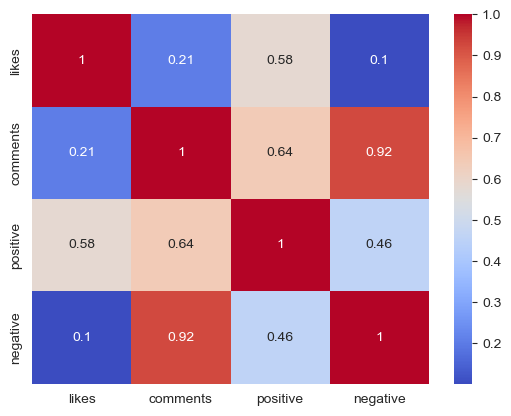

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Это можно проиллюстрировать с помощью корреляции и тепловой карты
correlation= df_vk_predicted[["likes", "comments", "positive",  "negative"]].corr(method="pearson")

sns.heatmap(correlation, annot=True, cmap="coolwarm")
# Нет, неправда, новость с большим количеством лайков получает много позитивных комментариев
# Нет неправда, количество комментариев не связано с количеством лайков (то есть комментарии люди чаще пишут, когда недовольны и не хотят ставить лайк)

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [25]:
df_vk_predicted

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,35.0,2.0
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,28.0,3.0
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,15.0,3.0
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,28.0,2.0
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,93.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",31.0,77.0,4.0
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,29.0,8.0
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,56.0,0.0
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.0,40.0,1.0


In [26]:
def formula(pos, neu, neg):
    a = 1 + pos
    b = 1 + neu + neg
    left = a / (a + b)
    right = 1.65 * np.sqrt(a*b/((a+b)**2 * (a+b+1)))
    return left - right

In [27]:
df_vk_predicted["sentiment"] = formula(df_vk_predicted["positive"],df_vk_predicted["neutral"], df_vk_predicted["negative"] )

In [28]:
df_vk_predicted.sort_values(by=["sentiment"], ascending=False) # Топ позитивных новостей

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive,sentiment
6651,22320852,https://rsport.ria.ru/rhythm_gym/20180913/1141...,2018-09-13 16:40:33,Сборная России выиграла командный турнир на че...,1387,53,NaN,сборная россии выиграла командный турнир на че...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,16.0,34.0,0.566760
14020,20027260,https://rsport.ria.ru/winter2018_paralympics/2...,2018-03-16 03:54:32,"Миленина выиграла биатлонную гонку на 12,5 км,...",1106,28,Россиянка Анна Миленина завоевала седьмое золо...,миленина выиграла биатлонную гонку на 125 км с...,россиянка анна миленина завоевала седьмое золо...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,8.0,16.0,0.502777
13735,20128079,https://rsport.ria.ru/artist_gym/20180323/1134...,2018-03-23 07:19:58,Россиянка Мельникова победила в многоборье на ...,670,17,NaN,россиянка мельникова победила в многоборье на ...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,4.0,10.0,0.502010
6620,22326485,https://rsport.ria.ru/shooting/20180914/114181...,2018-09-14 07:55:44,Россиянки заняли третье место в ските среди юн...,359,14,NaN,россиянки заняли третье место в ските среди юн...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,4.0,10.0,0.502010
12529,20591225,https://rsport.ria.ru/hockey/20180422/11358902...,2018-04-22 16:30:18,"""Ак Барс"" стал трехкратным обладателем Кубка Г...",1292,78,NaN,ак барс стал трехкратным обладателем кубка гаг...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,26.0,42.0,0.494670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14637,19791202,/world/20180228/1515415770.html,2018-02-28 03:11:26,Российские фотографы вошли в шорт-лист конкурс...,144,4,NaN,российские фотографы вошли в шортлист конкурса...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,4.0,0.0,-0.065751
14536,19834400,https://vk.com/app5748831_-15755094,2018-03-02 13:58:35,Рассылка,40,4,"Дорогие друзья, подписывайтесь на наши рассылк...",рассылка,дорогие друзья подписывайтесь на наши рассылки...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,2.0,0.0,-0.065751
14766,19753601,/culture/20180225/1515235807.html,2018-02-24 22:40:40,Кому достались медведи: на Берлинале объявили ...,92,3,NaN,кому достались медведи на берлинале объявили п...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,2.0,0.0,-0.069444
14836,19728851,/society/20180223/1515177230.html,2018-02-22 23:48:54,Дипломат и ученый: коллеги Фалина вспоминают е...,83,2,NaN,дипломат и ученый коллеги фалина вспоминают ег...,#UNKN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,2.0,0.0,-0.069521


In [29]:
# 10 самых топовых
pos_10 = df_vk_predicted.nlargest(10, "sentiment")["title_clean"]

for p in pos_10:
    print(p)
# ГООООЛ

сборная россии выиграла командный турнир на чемпионате мира по художественной гимнастике
миленина выиграла биатлонную гонку на 125 км став 7кратной чемпионкой паралимпиад
россиянки заняли третье место в ските среди юниорок на чемпионате мира по стрельбе
россиянка мельникова победила в многоборье на этапе км по спортивной гимнастике
ак барс стал трехкратным обладателем кубка гагарина
россиянин иван бессонов победил в конкурсе классического евровидения
сборная россии вернулась в москву после победы на юношеских олимпийских играх
ваши поздравления на елке россия сегодня в гуме
сербия обыграла костарику на чм2018
вопреки всему россияне стали вторыми на паралимпиаде


Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

__[0.6 балла] Задание 14:__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

In [30]:
idx2tag

{0: '2007',
 1: 'олег кононов',
 2: 'сиэтл',
 3: 'саммит по сирии в тегеране',
 4: 'саранск',
 5: 'realty-гид - крупным планом',
 6: 'антарктида',
 7: 'александр горшков',
 8: 'ростов-на-дону',
 9: 'новости - религия и мировоззрение',
 10: 'ватикан',
 11: 'григорий карасин',
 12: 'хельсинки',
 13: 'николай караченцов',
 14: 'новости подмосковья',
 15: 'сергей карасев',
 16: 'димитрис итудис',
 17: 'крушение катамарана в волгограде',
 18: 'брайан орсер',
 19: 'ситуация в каталонии после референдума о независимости',
 20: '"общественные мнения"',
 21: 'прибалтика',
 22: 'си цзиньпин',
 23: 'смоленская область',
 24: 'шнур (сергей шнуров)',
 25: 'мини-футбол',
 26: 'наука - риа новости. итоги дня',
 27: 'хакасия',
 28: 'юлия тимошенко',
 29: 'ямало-ненецкий автономный округ',
 30: 'саммит кндр и южной кореи',
 31: 'юрий трутнев',
 32: 'проблемы - туризм',
 33: 'департамент строительства г. москвы',
 34: 'карачаево-черкесская республика',
 35: 'взрослые и дети в медиа кампусе миа "россия с

In [ ]:
import ast
# df_vk_predicted["target_tags"] = df_vk_predicted["target_tags"].apply(ast.literal_eval)

In [36]:
import ast
def find_index_of_one(row):
    try:
        if isinstance(row, list):
            return row.index(1) if 1 in row else None
        else:
            row = ast.literal_eval(row)
            return row.index(1) if 1 in row else None
    except:
        return None
    return None

In [38]:
df_vk_predicted["target_tags"].apply(find_index_of_one)

0        642
1        373
2         59
3         59
4        181
        ... 
19923    163
19924    163
19925    288
19926     59
19927     59
Name: target_tags, Length: 19928, dtype: int64

In [39]:
df_vk_predicted["tag"] = df_vk_predicted["target_tags"].apply(find_index_of_one).apply(lambda x: idx2tag[x])

In [51]:
pd.DataFrame(df_vk_predicted[["tag", "sentiment"]].groupby("tag")["sentiment"].mean()).sort_values(by=["sentiment"], ascending=False)

,sentiment
tag,
дмитрий песков,0.360550
день победы,0.293894
второй тур региональных выборов в россии,0.293839
дональд туск,0.273990
элла памфилова,0.236696
...,...
иордания,-0.013525
саммит атэс в папуа-новой гвинее,-0.019615
орел,-0.025207


__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ